In [1]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot

In [2]:
df = pd.read_csv("Metro_Nashville_Police_Department_Calls_for_Service__2019_.csv", index_col='Event Number')

In [3]:
df.head()

,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,RPA,Latitude,Longitude,Mapped Location
Event Number,,,,,,,,,,,,,,,,,,
PD201900158507,02/20/2019 10:44:46 AM,20190138459,A,50,Theft,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,E CAMPBELL RD,MAPR,NaN,NaN,NaN,NaN,NaN,NaN
PD201900135069,02/13/2019 01:10:45 AM,20190117840,C,71,Burglary - Non-Residence,A,ALARM,6,ASSISTED OTHER UNIT,NaN,CHARLOTTE PKE,123C,NaN,NaN,NaN,NaN,NaN,NaN
PD201900149088,02/17/2019 12:47:28 PM,20190130236,A,50,Theft,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,CHAPEL AV,213B,NaN,NaN,NaN,NaN,NaN,NaN
PD201900148900,02/17/2019 10:46:09 AM,20190129933,A,45,Vehicle Accident - Property Damage,P,PROGRESS,6,ASSISTED OTHER UNIT,1200.0,2ND AV N,410A,C,13,4315.0,36.178,-86.785,"(36.178, -86.785)"
PD201900148353,02/17/2019 04:31:56 AM,20190129434,C,43,Want Officer for Investigation / Assistance,P,PROGRESS,8,ADVISED IN CIVIL CASE,100.0,N 1ST ST,415C,C,13,1993.0,36.172,-86.772,"(36.172, -86.772)"


In [4]:
df.shape

(785035, 18)

In [5]:
df.count()

Call Received                 785035
Complaint Number              785035
Shift                         754497
Tencode                       785035
Tencode Description           785035
Tencode Suffix                567571
Tencode Suffix Description    546827
Disposition Code              785035
Disposition Description       783773
Block                         760586
Street Name                   785029
Unit Dispatched               736217
Sector                        752994
Zone                          759604
RPA                           759725
Latitude                      757275
Longitude                     757275
Mapped Location               754258
dtype: int64

In [6]:
df.apply(lambda x: len(x.unique()))

Call Received                 763745
Complaint Number              734935
Shift                              4
Tencode                           52
Tencode Description               92
Tencode Suffix                    30
Tencode Suffix Description        21
Disposition Code                  17
Disposition Description           16
Block                            139
Street Name                    27641
Unit Dispatched                 2620
Sector                             9
Zone                              13
RPA                             1997
Latitude                         436
Longitude                        529
Mapped Location                40118
dtype: int64

In [7]:
df_new = df[['Call Received', 'Tencode Description','Disposition Description','Mapped Location']]
df_new.head()

,Call Received,Tencode Description,Disposition Description,Mapped Location
Event Number,,,,
PD201900158507,02/20/2019 10:44:46 AM,Theft,M.P.D. REPORT COMPLED,NaN
PD201900135069,02/13/2019 01:10:45 AM,Burglary - Non-Residence,ASSISTED OTHER UNIT,NaN
PD201900149088,02/17/2019 12:47:28 PM,Theft,M.P.D. REPORT COMPLED,NaN
PD201900148900,02/17/2019 10:46:09 AM,Vehicle Accident - Property Damage,ASSISTED OTHER UNIT,"(36.178, -86.785)"
PD201900148353,02/17/2019 04:31:56 AM,Want Officer for Investigation / Assistance,ADVISED IN CIVIL CASE,"(36.172, -86.772)"


In [8]:
df_new.shape

(785035, 4)

In [9]:
df_new['Call Received'] =  pd.to_datetime(df_new['Call Received'])

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_new['Call Time'] = [d.time() for d in df_new['Call Received']]

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_new['Call Day'] = df_new['Call Received'].dt.day_name()

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_new.count()

Call Received              785035
Tencode Description        785035
Disposition Description    783773
Mapped Location            754258
Call Time                  785035
Call Day                   785035
dtype: int64

In [13]:
df_new = df_new.assign(
    timeOfDay=pd.cut(
        df_new['Call Received'].dt.hour,
        [-1, 4, 8, 12, 16, 20, 24],
        labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']))

In [14]:
df_new.rename(columns = {'timeOfDay':'Call Time of Day'}, inplace = True)

In [15]:
df_new = df_new[['Call Received', 'Call Time', 'Call Day', 'Call Time of Day', 'Tencode Description','Disposition Description','Mapped Location']]

In [16]:
df_new.head()

,Call Received,Call Time,Call Day,Call Time of Day,Tencode Description,Disposition Description,Mapped Location
Event Number,,,,,,,
PD201900158507,2019-02-20 10:44:46,10:44:46,Wednesday,Morning,Theft,M.P.D. REPORT COMPLED,NaN
PD201900135069,2019-02-13 01:10:45,01:10:45,Wednesday,Late Night,Burglary - Non-Residence,ASSISTED OTHER UNIT,NaN
PD201900149088,2019-02-17 12:47:28,12:47:28,Sunday,Morning,Theft,M.P.D. REPORT COMPLED,NaN
PD201900148900,2019-02-17 10:46:09,10:46:09,Sunday,Morning,Vehicle Accident - Property Damage,ASSISTED OTHER UNIT,"(36.178, -86.785)"
PD201900148353,2019-02-17 04:31:56,04:31:56,Sunday,Late Night,Want Officer for Investigation / Assistance,ADVISED IN CIVIL CASE,"(36.172, -86.772)"


In [17]:
df_new.apply(lambda x: len(x.unique()))

Call Received              763745
Call Time                   86371
Call Day                        7
Call Time of Day                6
Tencode Description            92
Disposition Description        16
Mapped Location             40118
dtype: int64

In [18]:
df_new['Call Day'].value_counts(normalize=True)

Tuesday      0.162270
Wednesday    0.158904
Thursday     0.157190
Friday       0.152661
Monday       0.143796
Saturday     0.117800
Sunday       0.107379
Name: Call Day, dtype: float64

In [19]:
df_new['Call Time of Day'].value_counts(normalize=True)

Afternoon        0.192277
Morning          0.185593
Evening          0.180344
Late Night       0.167452
Early Morning    0.159974
Night            0.114361
Name: Call Time of Day, dtype: float64

In [20]:
df_time = df_new.groupby('Call Day')['Call Time of Day'].value_counts(normalize=True).to_frame()
df_time

Call Time of Day
Call Day  Call Time of Day                  
Friday    Afternoon                 0.190080
          Morning                   0.190039
          Evening                   0.188595
          Late Night                0.159307
          Early Morning             0.154893
          Night                     0.117086
Monday    Afternoon                 0.202649
          Morning                   0.194286
          Evening                   0.175320
          Early Morning             0.170200
          Late Night                0.149471
          Night                     0.108075
Saturday  Evening                   0.201953
          Late Night                0.190285
          Afternoon                 0.177763
          Morning                   0.161424
          Night                     0.136034
          Early Morning             0.132541
Sunday    Late Night                0.200709
          Afternoon                 0.179831
          Evening                   0.178739
          Morning                   0.164088
          Early Morning             0.149734
          Night                     0.126898
Thursday  Afternoon                 0.196653
          Morning                   0.189522
          Evening                   0.175089
          Late Night                0.164862
          Early Morning             0.164465
          Night                     0.109408
Tuesday   Afternoon                 0.199477
          Morning                   0.193943
          Evening                   0.175825
          Early Morning             0.168077
          Late Night                0.156789
          Night                     0.105889
Wednesday Morning                   0.193491
          Afternoon                 0.192489
          Evening                   0.171839
          Early Morning             0.170139
          Late Night                0.165602
          Night                     0.106441

In [21]:
df_time.unstack()

Call Time of Day                                     \
Call Time of Day        Afternoon Early Morning   Evening Late Night   
Call Day                                                               
Friday                   0.190080      0.154893  0.188595   0.159307   
Monday                   0.202649      0.170200  0.175320   0.149471   
Saturday                 0.177763      0.132541  0.201953   0.190285   
Sunday                   0.179831      0.149734  0.178739   0.200709   
Thursday                 0.196653      0.164465  0.175089   0.164862   
Tuesday                  0.199477      0.168077  0.175825   0.156789   
Wednesday                0.192489      0.170139  0.171839   0.165602   

                                      
Call Time of Day   Morning     Night  
Call Day                              
Friday            0.190039  0.117086  
Monday            0.194286  0.108075  
Saturday          0.161424  0.136034  
Sunday            0.164088  0.126898  
Thursday          0.189522  0.109408  
Tuesday           0.193943  0.105889  
Wednesday         0.193491  0.106441

In [22]:
df_new['Tencode Description'].unique()

array(['Theft', 'Burglary - Non-Residence',
       'Vehicle Accident - Property Damage',
       'Want Officer for Investigation / Assistance', 'Fixed Post',
       'Burglary - Residence', 'Suicidal Person',
       'Administrative/Special Assignment', 'Shots Fired',
       'Traffic Violation', 'Missing Person',
       'Vehicle Accident - Personal Injury', 'Business Check',
       'Disorderly Person', 'Safety Hazard',
       'Transport Prisoner / Suspect', 'Holdup / Robbery',
       'Fight / Assault', 'Mentally ILL Person',
       'Community Policing Activity', 'Dangerous / Injured Animal',
       'Fire', 'Suspicious Person', 'Corpse / D. O. A.',
       'Vehicle Blocking Right of Way', 'Person Indecently Exposed',
       'Intoxicated Person', 'Investigate 911 Hang-Up Call',
       'Person Screaming', 'Meal Break', 'Person with Weapon', 'Shooting',
       '50', 'Hazardous Liquid / Gas Leak', '3', 'Bank Robbery', '57',
       '53', '44', 'Gang Activity', '64', '54', '70', 'Prowler', '96',


In [23]:
df_new[df_new['Tencode Description'] == '3'].shape

(960, 7)

In [24]:
df_new[df_new['Tencode Description'] == 'Administrative/Special Assignment'].shape

(52458, 7)

In [26]:
td_replacements = {
    '3': 'Administrative/Special Assignment',
    '50': 'Theft',
    '57': 'Fight / Assault',
    '53': 'Holdup / Robbery',
    '44': 'Disorderly Person',
    '64': 'Corpse / D. O. A.',
    '54': 'Person with Weapon',
    '70': 'Burglary - Residence',
    '96': 'Business Check',
    '43': 'Want Officer for Investigation / Assistance',
    '95': 'Meal Break',
    '83': 'Shots Fired',
    '92': 'Fixed Post',
    '40': 'Suspicious Person',
    '93': 'Traffic Violation',
    '15': 'Community Policing Activity',
    '71': 'Burglary - Non-Residence',
    '88': 'Investigate 911 Hang-Up Call',
    '58': 'Prowler',
    '49': 'Vehicle Blocking Right of Way',
    '87': 'Safety Hazard',
    '75': 'Missing Person',
    '62': 'Person Screaming',
    '16': 'Transport Prisoner / Suspect',
    '45': 'Vehicle Accident - Property Damage',
    '42': 'Intoxicated Person',
    '73': 'Hazardous Liquid / Gas Leak',
    '46': 'Vehicle Accident - Personal Injury',
    '59': 'Person Indecently Exposed',
    '63': 'Suicidal Person',
    '65': 'Dangerous / Injured Animal',
    '35': 'Mentally ILL Person',
    '52': 'Shooting',
    '61': 'Fire',
    '51': 'Cutting / Stabbing',
    '14': 'Escort / Convoy',
    '8000': 'Explosion',
    '94': 'Personal Relief',
    '66': 'Bomb Threat',
    '85': 'Prisoner Escapee'
}

In [27]:
df_new['Tencode Description'] = df_new['Tencode Description'].map(td_replacements).fillna(df_new['Tencode Description'])

In [28]:
df_new[df_new['Tencode Description'] == '3'].shape

(0, 7)

In [29]:
df_new[df_new['Tencode Description'] == 'Administrative/Special Assignment'].shape

(53418, 7)

In [30]:
df_new['Tencode Description'].unique()

array(['Theft', 'Burglary - Non-Residence',
       'Vehicle Accident - Property Damage',
       'Want Officer for Investigation / Assistance', 'Fixed Post',
       'Burglary - Residence', 'Suicidal Person',
       'Administrative/Special Assignment', 'Shots Fired',
       'Traffic Violation', 'Missing Person',
       'Vehicle Accident - Personal Injury', 'Business Check',
       'Disorderly Person', 'Safety Hazard',
       'Transport Prisoner / Suspect', 'Holdup / Robbery',
       'Fight / Assault', 'Mentally ILL Person',
       'Community Policing Activity', 'Dangerous / Injured Animal',
       'Fire', 'Suspicious Person', 'Corpse / D. O. A.',
       'Vehicle Blocking Right of Way', 'Person Indecently Exposed',
       'Intoxicated Person', 'Investigate 911 Hang-Up Call',
       'Person Screaming', 'Meal Break', 'Person with Weapon', 'Shooting',
       'Hazardous Liquid / Gas Leak', 'Bank Robbery', 'Gang Activity',
       'Prowler', 'Cutting / Stabbing', 'Explosion', 'Personal Relief',

In [31]:
df_new['Tencode Description'].value_counts()

Want Officer for Investigation / Assistance    173126
Business Check                                 147235
Community Policing Activity                     60608
Administrative/Special Assignment               53418
Traffic Violation                               43541
Vehicle Accident - Property Damage              39224
Disorderly Person                               39038
Theft                                           37715
Safety Hazard                                   32105
Suspicious Person                               25206
Burglary - Residence                            24606
Burglary - Non-Residence                        22319
Investigate 911 Hang-Up Call                    15670
Vehicle Accident - Personal Injury              10640
Vehicle Blocking Right of Way                    8797
Fight / Assault                                  8308
Shots Fired                                      6616
Fixed Post                                       5225
Holdup / Robbery            

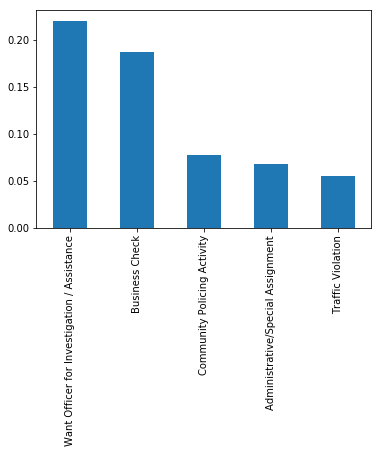

In [33]:
df_new['Tencode Description'].value_counts(normalize=True).head(5).plot(kind='bar')

In [44]:
df_top5_calls = df_new[
    (df_new['Tencode Description'] == 'Want Officer for Investigation / Assistance') |
    (df_new['Tencode Description'] == 'Business Check') |
    (df_new['Tencode Description'] == 'Community Policing Activity') |
    (df_new['Tencode Description'] == 'Administrative/Special Assignment') |
    (df_new['Tencode Description'] == 'Traffic Violation')
]

In [46]:
df_top5_calls.shape

(477928, 7)

In [47]:
df_top5_calls.head(10)

,Call Received,Call Time,Call Day,Call Time of Day,Tencode Description,Disposition Description,Mapped Location
Event Number,,,,,,,
PD201900148353,2019-02-17 04:31:56,04:31:56,Sunday,Late Night,Want Officer for Investigation / Assistance,ADVISED IN CIVIL CASE,"(36.172, -86.772)"
PD201900149310,2019-02-17 15:30:43,15:30:43,Sunday,Afternoon,Want Officer for Investigation / Assistance,ASSISTED CITIZEN,"(36.176, -86.794)"
PD201900149501,2019-02-17 17:20:15,17:20:15,Sunday,Evening,Want Officer for Investigation / Assistance,DISREGARD / SIGNAL 9,"(36.28, -86.835)"
PD201900149422,2019-02-17 16:37:19,16:37:19,Sunday,Afternoon,Want Officer for Investigation / Assistance,M.P.D. REPORT COMPLED,"(36.223, -86.809)"
PD201900148579,2019-02-17 07:06:20,07:06:20,Sunday,Early Morning,Administrative/Special Assignment,ASSISTED CITIZEN,"(36.166, -86.782)"
PD201900147906,2019-02-17 00:26:41,00:26:41,Sunday,Late Night,Traffic Violation,SUBJECT WARNED,"(36.191, -86.745)"
PD201900148817,2019-02-17 09:57:22,09:57:22,Sunday,Morning,Business Check,COMMUNITY POLICING,"(36.152, -86.834)"
PD201900148767,2019-02-17 09:30:04,09:30:04,Sunday,Morning,Administrative/Special Assignment,ASSISTED CITIZEN,"(36.171, -86.807)"
PD201900149324,2019-02-17 15:37:42,15:37:42,Sunday,Afternoon,Business Check,LOCATION/BUILDING SECURE,NaN


In [52]:
df_top_call = df_top5_calls[df_top5_calls['Tencode Description'] == 'Want Officer for Investigation / Assistance']

In [54]:
df_top_call.shape

(173126, 7)

In [58]:
df_top_call['Call Day'].value_counts(normalize=True)

Tuesday      0.163962
Wednesday    0.157446
Thursday     0.155222
Monday       0.148349
Friday       0.147869
Saturday     0.117989
Sunday       0.109163
Name: Call Day, dtype: float64

In [59]:
df_top_call['Call Time of Day'].value_counts(normalize=True)

Afternoon        0.217229
Evening          0.213249
Morning          0.198064
Late Night       0.130327
Night            0.126469
Early Morning    0.114662
Name: Call Time of Day, dtype: float64

In [60]:
df_top_call = df_top5_calls[df_top5_calls['Tencode Description'] == 'Want Officer for Investigation / Assistance'].groupby('Call Day')['Call Time of Day'].value_counts(normalize=True).to_frame()
df_top_call.unstack()

Call Time of Day                                     \
Call Time of Day        Afternoon Early Morning   Evening Late Night   
Call Day                                                               
Friday                   0.211758      0.117109  0.204570   0.125117   
Monday                   0.229841      0.114589  0.215318   0.106841   
Saturday                 0.195672      0.110295  0.207666   0.174769   
Sunday                   0.193926      0.110694  0.212815   0.193873   
Thursday                 0.225282      0.119227  0.213560   0.118855   
Tuesday                  0.228634      0.115656  0.220038   0.108363   
Wednesday                0.222980      0.112921  0.216560   0.114168   

                                      
Call Time of Day   Morning     Night  
Call Day                              
Friday            0.208828  0.132617  
Monday            0.212942  0.120469  
Saturday          0.165614  0.145983  
Sunday            0.160273  0.128419  
Thursday          0.201317  0.121758  
Tuesday           0.206722  0.120588  
Wednesday         0.212231  0.121139

In [65]:
df_new['Disposition Description'].value_counts(normalize=True)
#top 5 account for 72% of all calls

ASSISTED CITIZEN                 0.203838
LOCATION/BUILDING SECURE         0.149268
COMMUNITY POLICING               0.144566
DISREGARD / SIGNAL 9             0.126071
M.P.D. REPORT COMPLED            0.098170
ASSISTED OTHER UNIT              0.089915
GONE ON ARRIVAL                  0.062369
SUBJECT WARNED                   0.052728
CITATION - TRAFFIC               0.024938
NO RESPONSE                      0.020463
FALSE CALL                       0.011803
ARREST, CUSTODIAL OR CITATION    0.008445
ASSISTANCE REFUSED               0.003612
ADVISED IN CIVIL CASE            0.002335
ADVISORY / NOTICE FORM GIVEN     0.001479
Name: Disposition Description, dtype: float64